In [21]:
import pandas as pd
import numpy as np
import pandas.io.sql as pd_sql
import sqlite3 as sql
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib notebook

In [22]:
con = sql.connect(r'c:\users\rebecca\.spyder-py3\movies.db') 

movies = pd_sql.read_sql('select * from finalMovies_20180804', con, index_col='index')


## ---------------------------------------
## Regression Models
## ---------------------------------------

In [23]:
####Experiment: revenue greater than $100,000
test = movies[(movies['Revenue_Real']>100000)&(movies['Budget_Real']>0)&(movies['Rating_RT']>=0) & movies['imdbVotes']>0]

#Put zero where null
test['Revenue_Actor_Real']=test['Revenue_Actor_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test['Revenue_Director_Real']=test['Revenue_Director_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test['Revenue_Writer_Real']=test['Revenue_Writer_Real'].apply(lambda x: 0 if pd.isnull(x) else x)


C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [24]:
import statsmodels.api as sm

model = sm.OLS(test['Revenue_Real'], test[['Budget_Real', 'Rating_RT','imdbVotes', 'Summer', 'Winter', 'Holiday','Genre_Drama',
 'Genre_Comedy', 'Rated_G_PG', 'Rated_R',
'Comp_DreamWorks',
 'Comp_Fox',
 'Comp_Lionsgate',
 'Comp_MGM',
 'Comp_Miramax',
 'Comp_Paramount',
 'Comp_Sony',
 'Comp_Universal',
 'Comp_WarnerBros', 
 'Comp_Other', 
 'Revenue_Actor_Real',
  'Revenue_Director_Real',
  'Revenue_Writer_Real'  ]])

In [25]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Revenue_Real   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     540.8
Date:                Wed, 08 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:57:21   Log-Likelihood:                -75546.
No. Observations:                3770   AIC:                         1.511e+05
Df Residuals:                    3747   BIC:                         1.513e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Budget_Real               1.88

<IPython.core.display.Javascript object>


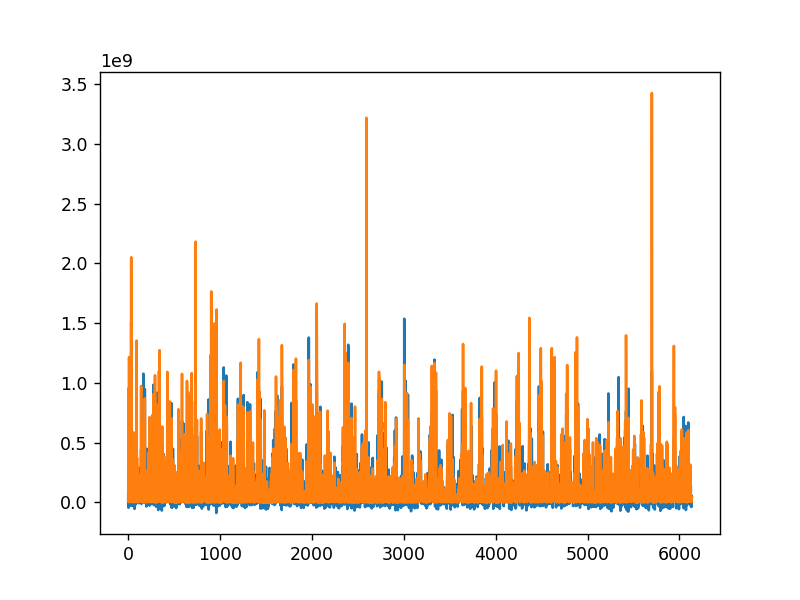

In [27]:
%matplotlib notebook
plt.plot(results.fittedvalues)#, test['Revenue_Real'])
plt.plot(test['Revenue_Real'])

## ---------------------------------------
## Classification Models
## ---------------------------------------

******************
RandomForest
******************

In [28]:
####Experiment: revenue greater than $100,000
test2 = movies[(movies['Revenue_Real']>0)&(movies['Budget_Real']>0)]
#test2 = movies[(movies['Revenue_Real']>100000) & (movies['Budget_Real']>0)]

#Make binary variable for if movie made at least 2x budget
test2['Profit_Bucket_Binary']=np.where(test2['Profit_Bucket']=='<1x', 0, np.where(test2['Profit_Bucket']=='[1-2x)', \
    0, np.where(test2['Profit_Bucket']=='[2-3x)', 1, np.where(test2['Profit_Bucket']=='[3-4x)', \
                       1, np.where(test2['Profit_Bucket']=='[4-5x)', 1, np.where(test2['Profit_Bucket']=='>=5x', 1, ''))))))

#Put zero where null
test2['Revenue_Actor_Real']=movies['Revenue_Actor_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test2['Revenue_Director_Real']=movies['Revenue_Director_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
test2['Revenue_Writer_Real']=movies['Revenue_Writer_Real'].apply(lambda x: 0 if pd.isnull(x) else x)


C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

0    2690
1    1971
Name: Profit_Bucket_Binary, dtype: int64


<IPython.core.display.Javascript object>


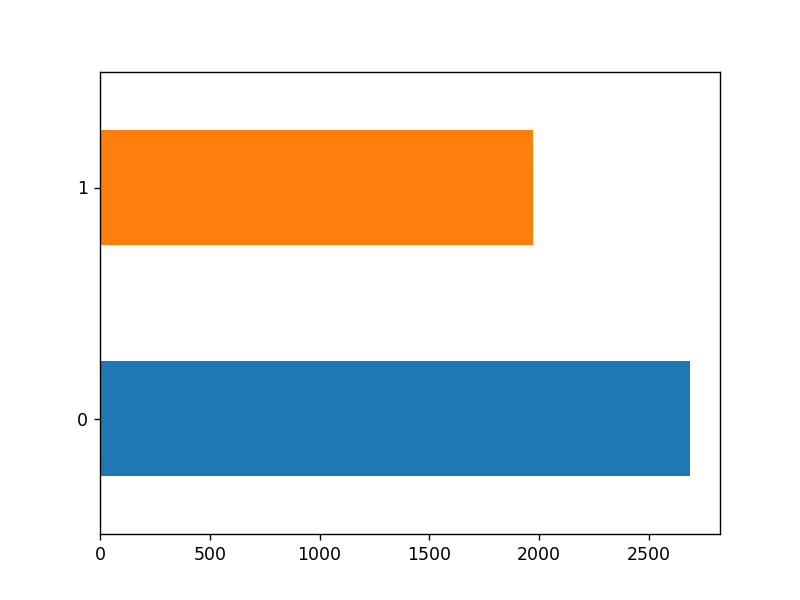

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

#Show distribution of profit bucket binary
print(test2['Profit_Bucket_Binary'].value_counts())
test2['Profit_Bucket_Binary'].value_counts().plot(kind='barh')

In [30]:
###Try doing just profit bucket <2, >2
###DISCUSS WHETHER IMDB VOTES OR AWARDS ARE APPROPRIATE VARIABLES!!!!!!
###They are good predictors, but we won't have those numbers before a movie opens, but potentially during a movie's run.
X = test2[["Budget_Real", "Holiday", "Summer", "Spring", "Fall", "Winter",'Genre_Drama',
 'Genre_Comedy',
 'Genre_Action_Adventure',
 'Genre_Thriller_Horror',
 'Genre_Romance',
 'Genre_Crime_Mystery',
 'Genre_Animation',
 'Genre_Scifi',
 'Genre_Documentary',
 'Genre_Other',
 'Rated_G_PG',
 'Rated_PG-13',
 'Rated_R',
 'Rated_Other','Comp_Disney',
 'Comp_DreamWorks',
 'Comp_Fox',
 'Comp_Lionsgate',
 'Comp_MGM',
 'Comp_Miramax',
 'Comp_Paramount',
 'Comp_Sony',
 'Comp_Universal',
 'Comp_WarnerBros',
 'Comp_Other',  
'Revenue_Actor_Real',
'Revenue_Director_Real', 
'Revenue_Writer_Real',
'Nominated_Major', 
'Nominated_Minor', 
'Won_Major', 
'Won_Minor'
]]
#y = test2["Profit_Bucket"]
y = test2["Profit_Bucket_Binary"]

In [31]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True) 

# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [32]:
rf.score(X_test, y_test)

0.7116827438370846

******************
SVM
******************

In [34]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']

splits     = cross_validation.train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)

model.fit(X_train, y_train)
model.score(X_test, y_test)
#expected   = y_test
#predicted  = model.predict(X_test)

#SVC_report = classification_report(expected, predicted)

0.5627009646302251

******************
Logistic Regression
******************

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)

In [36]:

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
log_reg = lr.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.6077170418006431

******************
XGBoost
******************

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed=3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=seed)
model=XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\Rebecca\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6881028938906752

## ------------------------
## Feature Selection
## ------------------------

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
test3=test2[(test2['Rating_RT']>=0) & (test2['Rating_IMDB']>=0)&
            (test2['Rating_Metacritic']>=0)]#& (test2['imdbVotes']>=0)]
features = test3[["Budget_Real", "Holiday", "Summer", "Spring", "Fall", 
    "Winter", "Rating_RT", "Rating_IMDB", "Rating_Metacritic",
    'Genre_Drama',
 'Genre_Comedy',
 'Genre_Action_Adventure',
 'Genre_Thriller_Horror',
 'Genre_Romance',
 'Genre_Crime_Mystery',
 'Genre_Animation',
 'Genre_Scifi',
 'Genre_Documentary',
 'Genre_Other',
 'Rated_G_PG',
 'Rated_PG-13',
 'Rated_R',
 'Rated_Other','Comp_Disney',
 'Comp_DreamWorks',
 'Comp_Fox',
 'Comp_Lionsgate',
 'Comp_MGM',
 'Comp_Miramax',
 'Comp_Paramount',
 'Comp_Sony',
 'Comp_Universal',
 'Comp_WarnerBros',
 'Comp_Other',  'Revenue_Actor_Real', 'Revenue_Director_Real',
                  'Revenue_Writer_Real',
'Nominated_Major', 'Nominated_Minor', 
           'Won_Major', 'Won_Minor'
]]
labels = test3["Profit_Bucket_Binary"]

In [39]:
model.fit(features, labels)
model.feature_importances_

array([0.14701898, 0.        , 0.00492359, 0.00201675, 0.01824099,
       0.01201087, 0.02729088, 0.09224654, 0.02971546, 0.04804237,
       0.0282233 , 0.00543899, 0.02452617, 0.00554242, 0.00294345,
       0.00173207, 0.01042566, 0.00164746, 0.02233383, 0.00832919,
       0.00795397, 0.02629648, 0.02953885, 0.02056429, 0.004251  ,
       0.01781597, 0.01198219, 0.        , 0.00301647, 0.00463476,
       0.01087854, 0.01567039, 0.        , 0.0089303 , 0.06704078,
       0.02670069, 0.06492184, 0.00871508, 0.11451126, 0.01240309,
       0.05152508])

<IPython.core.display.Javascript object>


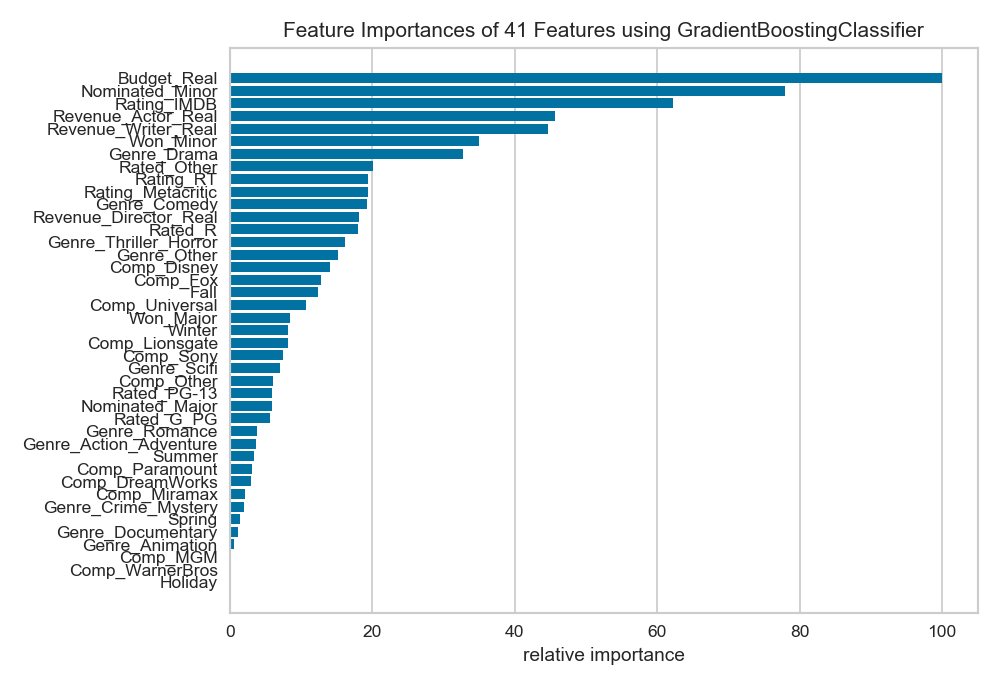

In [40]:
%matplotlib notebook
from yellowbrick.features import FeatureImportances

oz=FeatureImportances(GradientBoostingClassifier())
oz.fit(features, labels)
oz.poof()

*********************************
Experiment with Ridge, Lasso, ElasticNet....not working yet.
*********************************

In [41]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#model = Lasso()
model = Lasso(alpha=0.1)
results=model.fit(features, labels)
#print(list(zip(features, model.coef_.tolist())))
model.score(features, labels)

0.09965424812008616

In [42]:

#model = Ridge()
model = Ridge(alpha=0.001)
model.fit(features, labels)
#print(list(zip(features, model.coef_.tolist())))
model.score(features, labels)

C:\Users\Rebecca\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.784018604550782e-26 / 1.1102230246251565e-16
  RuntimeWarning)


0.20399609272029495

In [43]:
#model = ElasticNet()
model = ElasticNet(l1_ratio = 0.00001)
model.fit(features, labels)
#print(list(zip(features, model.coef_.tolist())))
model.score(features, labels)

0.1264511206180554